Mean values for each Passenger Class:
         Survived        Age       Fare
Pclass                                
1       0.629630  38.233441  84.154687
2       0.472826  29.877630  20.662183
3       0.242363  25.140620  13.675550


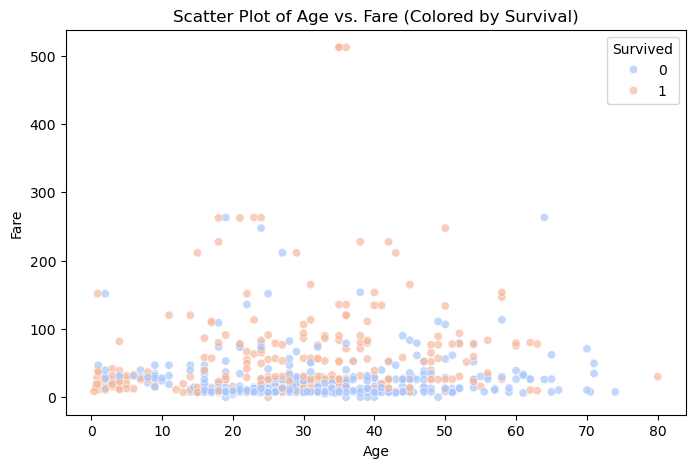

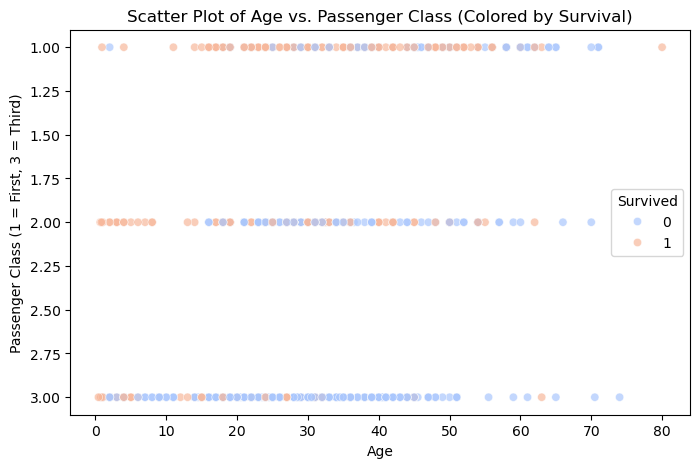

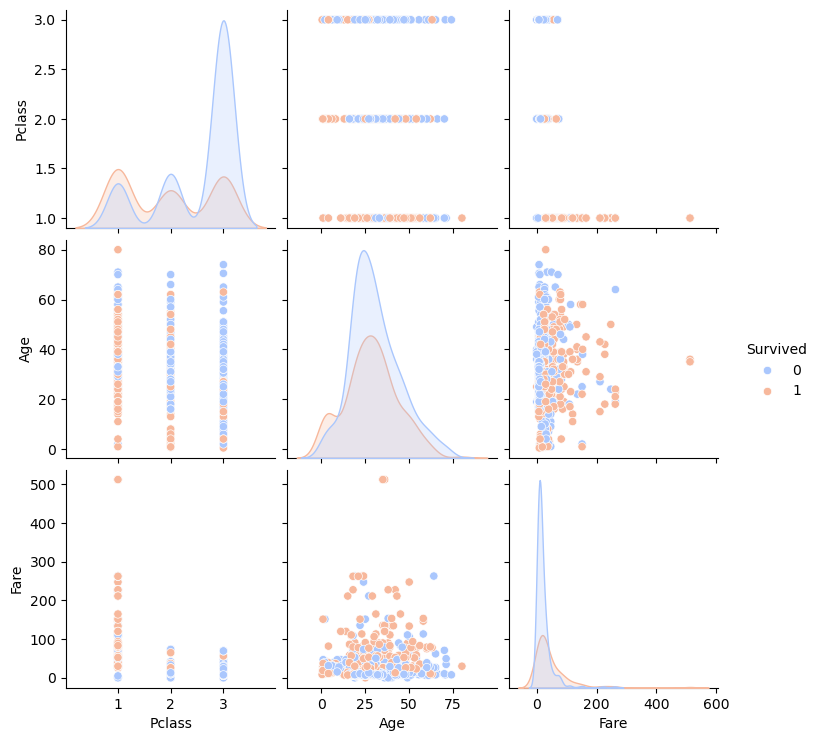

In [199]:
import pandas as pd
# Import display to show all at once
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Titanic-Dataset.csv")  # Load CSV file into Pandas DataFrame

# Data Exploration
#df.info()  # Checking column names, data types, and missing values
#display(df.describe())  # Display first 5 rows
#display(df.head())  # Display first 5 rows

# Data cleaning
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
display(missing_values[missing_values > 0])


# Interpolate missing values for numerical columns
df['Age'] = df['Age'].interpolate()

# Fill categorical missing values with mode
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column
df.drop(columns=['Cabin'], inplace=True)

# Define IQR
Q1 = df[['Age']].quantile(0.25)
Q3 = df[['Age']].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df['Age'] < lower_bound['Age']) | (df['Age'] > upper_bound['Age']))]

# Histogram: Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Box Plot: Age Distribution (Detecting Outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'], color='red')
plt.title("Box Plot of Age")
plt.xlabel("Age ($)")
plt.show()

# Count Plot: Survived vs Not Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Count Plot: Passenger Class (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df, palette='muted')
plt.title("Passenger Class Distribution")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count")
plt.show()

# Pie Chart: Distribution of Sex
plt.figure(figsize=(6, 6))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# Bar Plot: Survival Rate by Class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='coolwarm')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# Pair Plot for Multivariate Analysis
sns.pairplot(df, vars=['Age', 'Fare', 'Pclass', 'Survived'], hue='Survived', palette='coolwarm')
plt.show()

# A) Binning Age into Categories
# Define bins and labels
bins = [0, 18, 40, 60, np.inf]  # np.inf means "greater than 60"
labels = ["Young", "Adult", "Middle-aged", "Senior"]

# Create a new column for Age Category
df["Age_Category"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Display first few rows
#df[["Age", "Age_Category"]].head(6)

# B)
# One-Hot Encode the 'Embarked' column
#df = pd.get_dummies(df, columns=["Embarked"], prefix="Embarked")

# Display first few rows
#df.head()

# C)
# Compute Mean, Median, and Standard Deviation
num_stats = df[["Age", "Fare", "SibSp", "Parch"]].agg(["mean", "median", "std"])

# Display using print()
#print("Numerical Feature Statistics:\n", num_stats)

# D)
# Count occurrences of categorical variables
cat_stats = df[["Pclass", "Sex", "Age_Category"]].apply(pd.Series.value_counts)

# Display using print()
print("Categorical Feature Counts:\n", cat_stats)

# E)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["Age", "Fare", "SibSp", "Parch"]])
plt.title("Box Plot of Numerical Features")
plt.show()

# F)
plt.figure(figsize=(8, 5))
sns.countplot(x="Pclass", data=df, palette="muted")
plt.title("Passenger Class Distribution")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Task 3: Data Wrangling and Analysis
# A)
# Select relevant columns for analysis
df_selected = df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']]
df_selected.head()

# B)

# Select only numeric columns for mean calculation
df_numeric = df_selected.select_dtypes(include=['number'])

# Group by Passenger Class and calculate mean
grouped_pclass = df_numeric.groupby("Pclass").mean()

# Display the result
print("Mean values for each Passenger Class:\n", grouped_pclass)



# C)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Age"], y=df["Fare"], hue=df["Survived"], alpha=0.7, palette="coolwarm")
plt.title("Scatter Plot of Age vs. Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# D)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Age"], y=df["Pclass"], hue=df["Survived"], alpha=0.7, palette="coolwarm")
plt.title("Scatter Plot of Age vs. Passenger Class (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Passenger Class (1 = First, 3 = Third)")
plt.gca().invert_yaxis()  # Invert Y-axis to align Pclass (1st at top)
plt.show()

# E) 
sns.pairplot(df_selected, hue="Survived", palette="coolwarm")
plt.show()


Data Exploration
1. Load the Dataset
    We start by loading the dataset using pandas. This dataset appears to be from the Titanic dataset, containing passenger information.

2. Exploring the Dataset Structure

    To understand the structure of the dataset, we use .info().
    
    Observations from .info()
    
    The dataset contains 891 rows and 12 columns.
    The columns have different data types:
    int64: PassengerId, Survived, Pclass, SibSp, Parch
    float64: Age, Fare
    object: Name, Sex, Ticket, Cabin, Embarked
    Missing values:
    Age: 177 missing values
    Emarked: 2
    Cabin: 687 missing values (significant missing data)

3. Summary Statistics
    Using .describe(), we get an overview of the numerical data.
    Observations from .describe()
    
    The average age is 30.27 years, with a max of 76 years.
    The dataset has a class distribution (Pclass):
    1st class: 25% percentile
    3rd class: 50% percentile (median)
    3rd class: 75% percentile (majority of passengers)
    The fare has a large range (from 0 to 512), indicating a significant difference in ticket pricing.
    The Survived column shows that only 36.36% of the passengers in this dataset survived.

4. First Five Rows of the Dataset
   Using df.head() we are viewing the first 5 rows
   This shows the first five rows of the dataset, helping us verify how data is structured.

Data Cleaning:
1. To identify columns with missing values did we use df.isnull().sum()
 ðŸ”¹ Expected Output:

        Columns Age, Fare, and Cabin have missing values.
    
        Age: 86 missing values
        Fare: 1 missing value
        Cabin: 327 missing values (more than 50%)
2. Handle Missing Values
    
    a) Numerical Columns (Interpolation)
    For numerical columns like Age and Fare, we use interpolation, which estimates missing values based on existing trends.
   
    b) Categorical Columns (Fill with Mode)
    For categorical data like Embarked, we fill missing values with the mode (most frequent value).

3. Drop Columns with More than 50% Missing Values
    Columns with excessive missing data might not be useful.
    We remove Cabin since 327/418 (~78%) values are missing.

4. Drop Extreme Outliers
    Outliers can skew analysis.
    We use the Interquartile Range (IQR) method to remove extreme values in numerical columns like Age.


Task 2: Feature Engineering and Descriptive Statistics
    a) Binning Age into Categories
        Instead of using continuous values for Age, we will create categories:
        
        Young: 0 - 18 years
        Adult: 19 - 40 years
        Middle-aged: 41 - 60 years
        Senior: 60+ years
        
    b) One-Hot Encoding for a Categorical Variable
    One-hot encoding converts categorical values into numerical form (binary columns).
    We apply One-Hot Encoding to the Embarked column.
    
    ðŸ”¹ Code for One-Hot Encoding
    
Descriptive Statistics
     We will:  Compute mean, median, and standard deviation for numerical features.
     Count the frequency of categorical features.
    
     c) Descriptive Statistics for Numerical Features
     d) Count Frequency of Categorical Features

Visualization
    We will Use Box Plots to Identify Outliers
    Use Bar Plots for Categorical Features
    
    e) Box Plot for Numerical Features (Detect Outliers)
    f) Bar Plot for Categorical Features

Task 3: Data Wrangling and Analysis
    We will prepare the data, perform analysis, and extract insights step by step.
    
    Step 1: Data Selection and Wrangling
    We will:
        Select a subset of relevant columns
        Use .groupby() to calculate mean values for categories
    
    a) Select Relevant Columns
    Letâ€™s assume we are interested in predicting survival (Survived) based on Pclass, Age, Fare, and Sex.
     
    b) Use .groupby() to Aggregate Data
    We can group by Pclass (Passenger Class) and calculate the mean survival rate, fare, and age.

    Step 2: Data Analysis
    We will:
        Use scatter plots to visualize relationships
        Create a pairplot for multiple relationships
    
    c) Scatter Plot: Fare vs. Age
    d) Scatter Plot: Age vs. Pclass
    e) Pairplot for Pairwise Relationships

    Step 3: Insights from the Analysis
    From the grouped data, scatter plots, and pairplot, we can conclude:
    
    Key Insights
        Survival rates were higher for first-class passengers.
    
    Higher ticket prices (Fare) indicate higher survival chances.
    Third-class passengers had the lowest survival rate.
        Older passengers were more likely to be in first-class.
    
    Younger passengers mostly traveled in third-class.
    First-class passengers tended to be older and wealthier.
        Fare has a strong impact on survival.
    
    Passengers who paid more had a better chance of survival.
    This confirms wealthier passengers were prioritized during evacuation.
